# Temporal Descriptive Analysis - Chicago 2017

In this notebook the prepared dataset is used to analyse the temporal dimension of the bike-sharing in Chicago in 2017. The results are then visualized.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#read dataset
path = "../chicago_2017_prepared.csv"
bike_data = pd.read_csv(path, parse_dates=["start_time","end_time"])
bike_data.head(1)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525


### Add trip duration feature

The trip duration is important for understanding the user behaviour. The data has not to be cleaned for outliers since the provider already droped trips lasting longer than 24 hours.

In [6]:
timedelta = bike_data["end_time"] - bike_data["start_time"]
bike_data["duration"] = timedelta.apply(lambda x:x.seconds)
bike_data["duration_min"] = bike_data["duration"].apply(lambda x:(int) (x/60))
bike_data.head(1)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,duration,duration_min
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,356,5


In [5]:
#remove outliers
bike_data["duration_min"].max()

1438

### Overall temporal distribution of bike trips

We start with a basic visualization of the number of trips in a specific timeframe. This will give us a nice overview of the trips distribution over time.
Lets go from smalles to largest timeframe: start hour -> start day -> start month

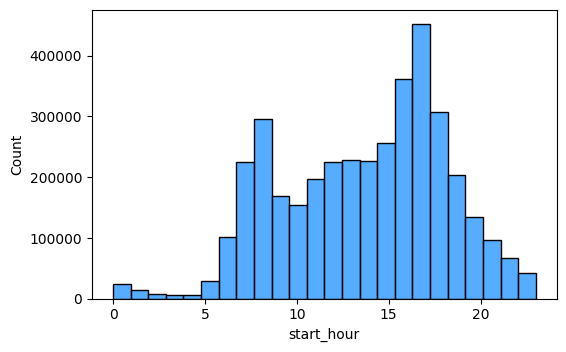

In [6]:
# distribution by start hour
rcParams['figure.figsize'] = 6, 3.75
plot = sns.histplot(data=bike_data, x="start_hour", color="dodgerblue", bins=24)

<AxesSubplot: xlabel='start_weekday', ylabel='Count'>

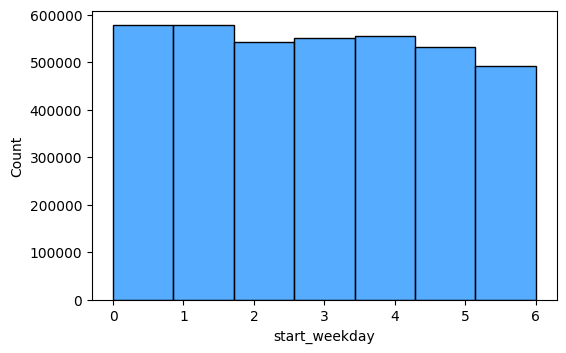

In [7]:
#distribution by start day
sns.histplot(data=bike_data, x="start_weekday", color="dodgerblue", bins= 7)

<AxesSubplot: xlabel='start_month', ylabel='Count'>

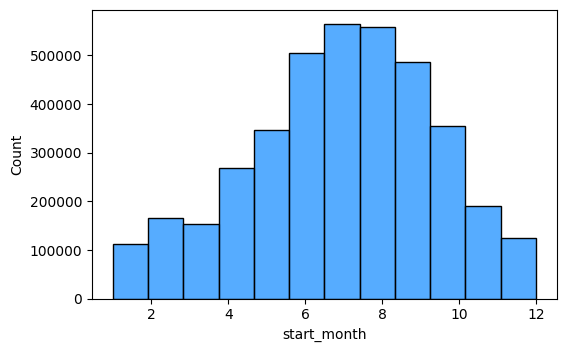

In [8]:
# distribution by start month
sns.histplot(data=bike_data, x="start_month", color="dodgerblue", bins= 12)

There are several things to note in these charts.

Starting with the distribution by hour we can see that there are peaks in trip count in the hours 7am to 9am and in the hours 3pm to 6pm. The drops during the night are to be expected due to less overall urban activity at nighttime.
A possible explanation for this pattern would be that the bikes are used for commutes. This would fit with the two peaks of trips count as the those fall right into normal commuting hours.

In the chart by weekday there is no obvious pattern. While there is a overall decline in trips over the course of the week, it is not very pronouced. Howevery we should keep it in mind for later analysis.

In the third chart we can clearly see that the bikes are used alot more in the summer than in the winter. About 5 times more trips were done in July and August than in December and January.

#### Trip duration

Next is the distribution of trip durations. The duration of a trips influences the wear on the bikes as well as bike availability.

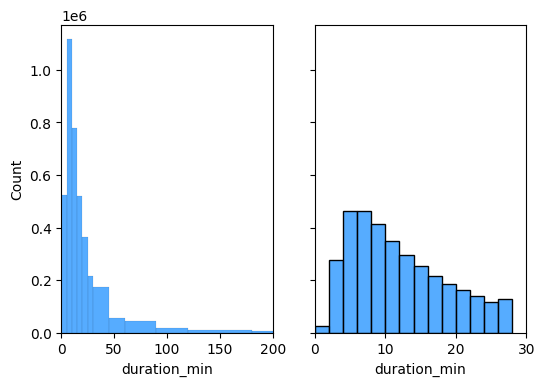

In [9]:
# distribution of trips by duration +  zoomed in version (y scale is shared)
bins_overview = [0,5,10,15,20,25,30,45,60,90,120,180,1440]
bins_zoomed = range(0,30,2)
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
plot = sns.histplot(data=bike_data, x="duration_min", color="dodgerblue", bins=bins_overview, ax=axes[0])
plot.set(xlim=(0,200))
plot = sns.histplot(data=bike_data, x="duration_min", color="dodgerblue", bins=bins_zoomed, ax=axes[1])
plot.set(xlim=(0,30))
plt.show()

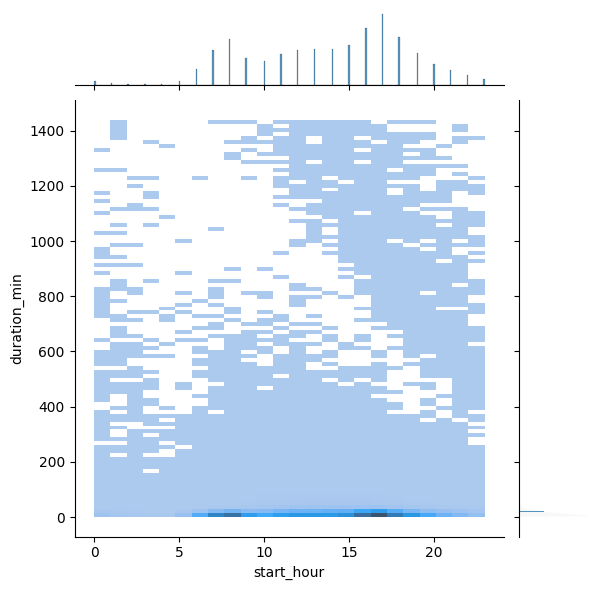

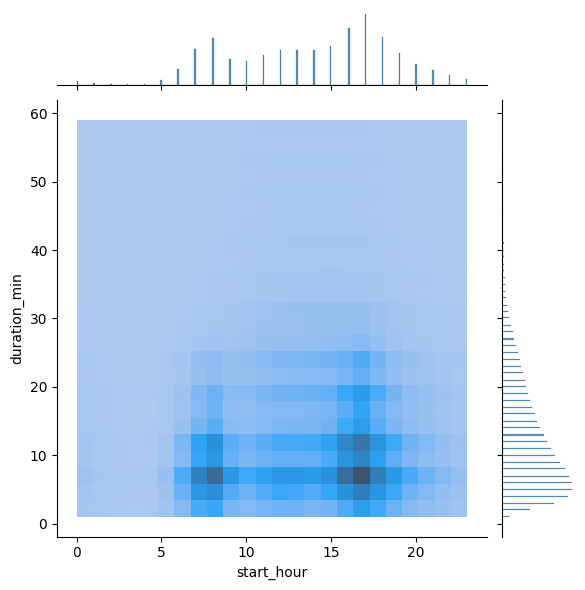

In [10]:
# trips duration in relation to trips start time
# the second plot is zoomed in
sns.jointplot(data=bike_data, x="start_hour", y="duration_min", kind="hist", bins=[24,100])
sns.jointplot(data=bike_data[bike_data["duration_min"] < 60], x="start_hour", y="duration_min", kind="hist", bins=[24,24])

Most notable here is that most trips have a duration of below 10 minutes. Only very few trips take more than 30 minutes. Also there does not seem to be a unexpected realation between start hour and trip duration.

Now we investigate the start hour further since it has this interesting "two-peak" pattern.

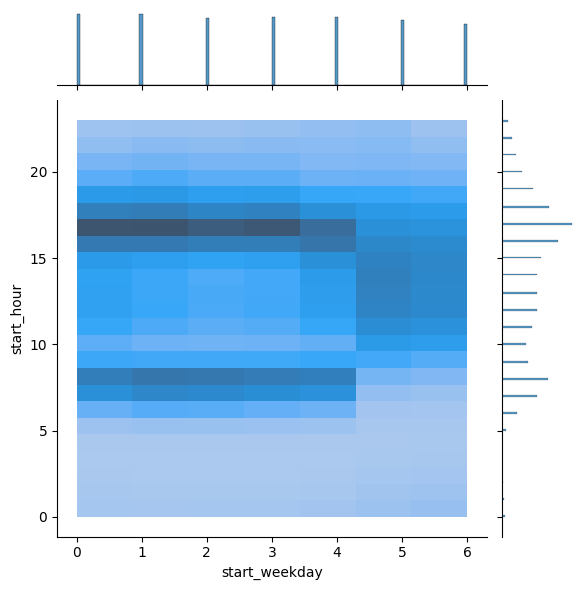

In [11]:
# plot start hour against start weekday
sns.jointplot(data=bike_data, x="start_weekday", y="start_hour", kind="hist", bins=[7,24])

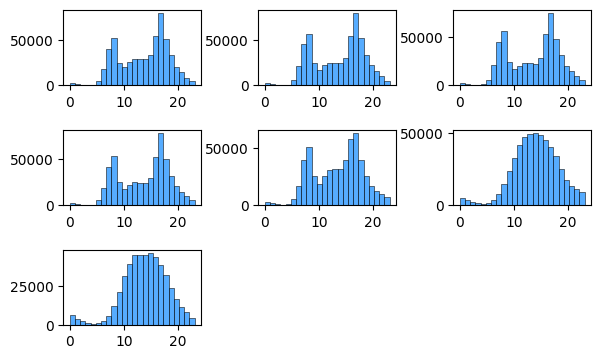

In [12]:
# plot start hour per weekday, one chart per weekday
f, axes = plt.subplots(3, 3)
charts = list()
plt.tight_layout()
plt.xlabel("")
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 0], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,0]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 1], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,1]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 2], x="start_hour", color="dodgerblue", bins= 24, ax=axes[0,2]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 3], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,0]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 4], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,1]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 5], x="start_hour", color="dodgerblue", bins= 24, ax=axes[1,2]))
charts.append(sns.histplot(data=bike_data[bike_data["start_weekday"] == 6], x="start_hour", color="dodgerblue", bins= 24, ax=axes[2,0]))

for chart in charts:
    chart.set(xlabel=None, ylabel=None)

axes[2,1].remove()
axes[2,2].remove()
plt.show()

In the joint plot with start hour and weekday we see something very interesting. The "two-peak" pattern is only present on workdays aka. non weekend days. This can be seen again in the second collection of charts. In the last two charts (Saturday and Sunday) the "two-peak" pattern is not present at all.

This further supports the cummuting hours hypothesis.

### Incorporate weather data

Now lets see how trips are done with respect to the current weather. Since the amount of trips longer than 3 hour is negligible we assume that the weather does not significantly change during a trip (max_temp = min_temp).

In [13]:
print("Trips longer than 3 hours: " + str(len(bike_data[bike_data["duration_min"] >= 180])))
print("Total trips: " + str(len(bike_data.index)))

Trips longer than 3 hours: 7599
Total trips: 3828954


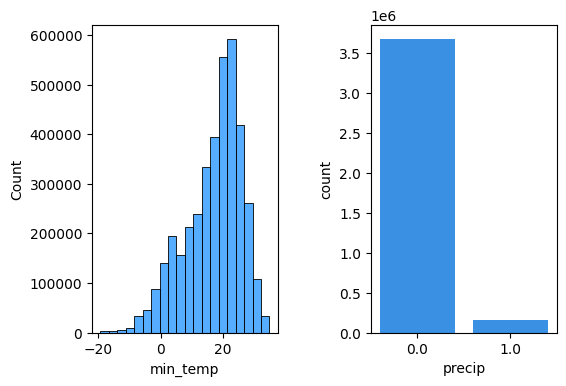

In [14]:
f, axes = plt.subplots(1, 2, figsize=(6, 4))
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=bike_data, x="min_temp", color="dodgerblue", bins= 20, ax=axes[0])
sns.countplot(data=bike_data, x="precip", color="dodgerblue", ax=axes[1])
plt.show()


As we can see most trips are done around 20 degree Celcius. This is fitting since most trips are done in the summer months. Also the trip count of trips during rain is very low compared to on rainy trips. Both of these are probably due to conveniece factors. Riding a bike in warm weather without rain is much more pleasent than in cold rainy weather.

### Incorporate user type


<AxesSubplot: xlabel='user_type', ylabel='count'>

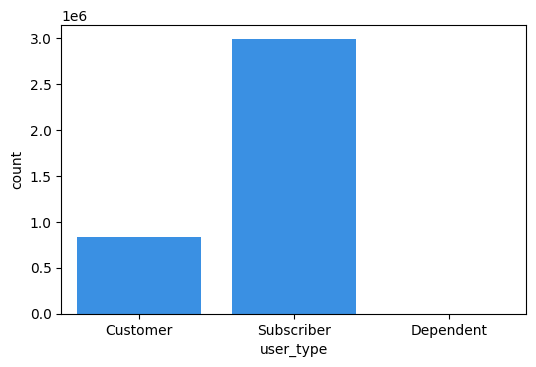

In [15]:
# number of trips per user type
sns.countplot(data=bike_data, x="user_type", color="dodgerblue")

In [16]:
len(bike_data[bike_data["user_type"] == "Dependent"])

7

Since there is only one trip by user type "Dependent" we remove it from the dataset for clearer charts.

In [7]:
bike_data_clean = bike_data[bike_data["user_type"] != "Dependent"]

: 

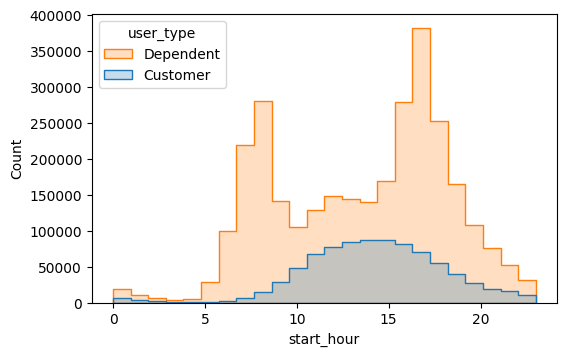

In [18]:
# trip count of Customers and Subscribers by start hour
plot = sns.histplot(data=bike_data_clean, x="start_hour", hue="user_type", bins=24, element="step", legend=False)
plt.legend(title="user_type", loc="upper left", labels=[ "Subscriber", "Customer"])
plt.show(plot)

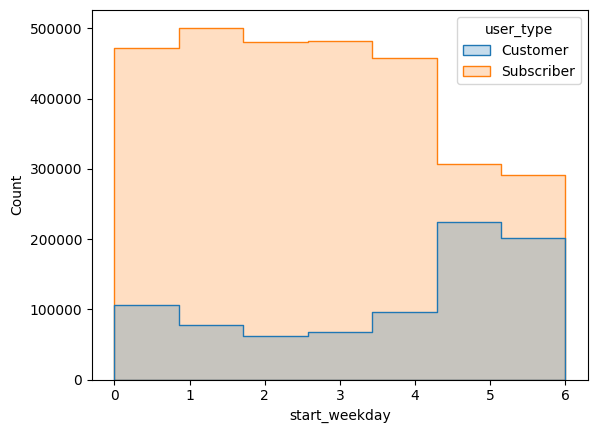

In [7]:
# trips count of Subscriber and Customer by start weekday
plot = sns.histplot(data=bike_data_clean, x="start_weekday", hue="user_type", bins=7, element="step")

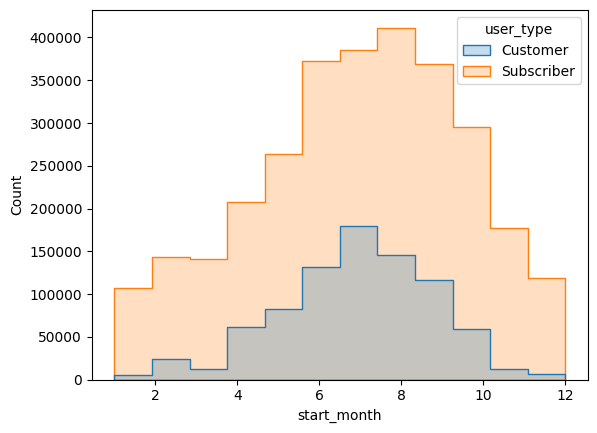

: 

In [8]:
# trips count of Subscriber and Customer by start month
plot = sns.histplot(data=bike_data_clean, x="start_month", hue="user_type", bins=12, element="step")

Clearly Subscribers make up the most number of trips. They are also the ones responsible for the "two-peak" pattern. The amount of Customer trips peaks in the early afternoon.

Even more notably during weekdays alot more trips are done by Subscribers than by Customers. On the weekend there are alot more Customers, but more trips are still done by Subscribers.

Also the number of trips by Subscribers is far more consistent over the winter months. During those there are very few trips made by Customers. Customers are more present in the summer months, where they make up nearly half of all trips.

In [ ]:
# compare trips by subscribers and Customer during rain (left is rain, right is no rain)
trips_with_rain = bike_data_clean[bike_data_clean["precip"] == 1.0]
trips_no_rain = bike_data_clean[bike_data_clean["precip"] == 0.0]

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=trips_with_rain, x="start_hour", hue="user_type", color="dodgerblue", bins= 24, ax=axes[0])
sns.histplot(data=trips_no_rain, x="start_hour", hue="user_type", color="dodgerblue", bins= 24, ax=axes[1])
plt.show()

Here we can also see that Customers are less likely to use bikesharing during rainy hours compared to Subscribers.

In [ ]:
# compare trip duration of Customers and subscribers
plot = sns.boxplot(x="start_weekday", y="duration_min", data=bike_data_clean, hue ="user_type")
plt.ylim((0,70))
plt.legend(title='user_type', loc='upper left', labels=['Subscriber', 'Customer'])
leg = plot.get_legend()
leg.legendHandles[0].set_color('steelblue')
leg.legendHandles[1].set_color('peru')
plt.show(plot)

Here we can also see that Customers take generally longer trips with more variance in length compared to Subscribers.